In [16]:
import zipfile
import os

# Extracting the contents of the uploaded zip file
zip_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive10.zip'
extract_folder = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/extracted_data'

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing the extracted files
extracted_files = os.listdir(extract_folder)
extracted_files


['Alternative Fuel Vehicles US.csv',
 'Alternative Fuels Vehicle Models Summary.pdf',
 'ElectricCarData_Clean.csv',
 'ElectricCarData_Norm.csv',
 'Energy Data.xlsx',
 'Energy Data1.csv',
 'Light Duty Vehicles.csv',
 'Medium and Heavy Duty Vehicles.csv']

In [3]:
import pandas as pd

# Function to load and preview data
def preview_data(file_name):
    file_path = os.path.join(extract_folder, file_name)
    if file_name.endswith('.csv'):
        return pd.read_csv(file_path).head()
    elif file_name.endswith('.xlsx'):
        return pd.read_excel(file_path).head()
    else:
        return "Unsupported file format"

# Previewing the first file
preview_energy_data_csv = preview_data('Energy Data1.csv')

# Previewing the second file
preview_energy_data_xlsx = preview_data('Energy Data.xlsx')

preview_energy_data_csv, preview_energy_data_xlsx


(   Year  Energy Related CO2missions (Gigatonnes)  \
 0  1991                                     20.6   
 1  1992                                     20.5   
 2  1993                                     20.6   
 3  1994                                     20.7   
 4  1995                                     21.3   
 
    Oil Production (Million barrels per day)  \
 0                                     65.44   
 1                                     65.71   
 2                                     65.99   
 3                                     66.89   
 4                                     67.85   
 
    Natural Gas Production (Billion Cubic Metres)  \
 0                                         2026.8   
 1                                         2039.4   
 2                                         2073.5   
 3                                         2095.7   
 4                                         2136.1   
 
    Coal Production (million tons) Electricity Generation (Terawatt-ho

In [5]:
# Importing necessary libraries for data preprocessing
import pandas as pd

# Function to load data
def load_data(file_name):
    file_path = os.path.join(extract_folder, file_name)
    if file_name.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_name.endswith('.xlsx'):
        return pd.read_excel(file_path)
    else:
        return "Unsupported file format"

# Loading the data from both files
data_csv = load_data('Energy Data1.csv')
data_xlsx = load_data('Energy Data.xlsx')

# Checking for missing values and data types in both datasets
data_csv_info = data_csv.info()
data_xlsx_info = data_xlsx.info()

data_csv_info, data_xlsx_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           32 non-null     int64  
 1   Energy Related CO2missions (Gigatonnes)        31 non-null     float64
 2   Oil Production (Million barrels per day)       31 non-null     float64
 3   Natural Gas Production (Billion Cubic Metres)  30 non-null     float64
 4   Coal Production (million tons)                 30 non-null     float64
 5   Electricity Generation (Terawatt-hours)        31 non-null     object 
 6   Hydroelectricity consumption in TWh            31 non-null     float64
 7   Nuclear energy consumption in TWh              31 non-null     float64
 8   Installed Solar Capacity (GW)                  22 non-null     float64
 9   Installed Wind Capacity in GW                  31 non-nu

(None, None)

In [6]:
# Converting 'Electricity Generation (Terawatt-hours)' to numeric
data_csv['Electricity Generation (Terawatt-hours)'] = pd.to_numeric(
    data_csv['Electricity Generation (Terawatt-hours)'].str.replace(',', ''), errors='coerce')

# Filling missing values with mean
data_csv.fillna(data_csv.mean(), inplace=True)

# Checking the updated info of the dataset
data_csv_info_updated = data_csv.info()
data_csv_info_updated, data_csv.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           32 non-null     int64  
 1   Energy Related CO2missions (Gigatonnes)        32 non-null     float64
 2   Oil Production (Million barrels per day)       32 non-null     float64
 3   Natural Gas Production (Billion Cubic Metres)  32 non-null     float64
 4   Coal Production (million tons)                 32 non-null     float64
 5   Electricity Generation (Terawatt-hours)        32 non-null     float64
 6   Hydroelectricity consumption in TWh            32 non-null     float64
 7   Nuclear energy consumption in TWh              32 non-null     float64
 8   Installed Solar Capacity (GW)                  32 non-null     float64
 9   Installed Wind Capacity in GW                  32 non-nu

(None,
    Year  Energy Related CO2missions (Gigatonnes)  \
 0  1991                                     20.6   
 1  1992                                     20.5   
 2  1993                                     20.6   
 3  1994                                     20.7   
 4  1995                                     21.3   
 
    Oil Production (Million barrels per day)  \
 0                                     65.44   
 1                                     65.71   
 2                                     65.99   
 3                                     66.89   
 4                                     67.85   
 
    Natural Gas Production (Billion Cubic Metres)  \
 0                                         2026.8   
 1                                         2039.4   
 2                                         2073.5   
 3                                         2095.7   
 4                                         2136.1   
 
    Coal Production (million tons)  Electricity Generation (Ter

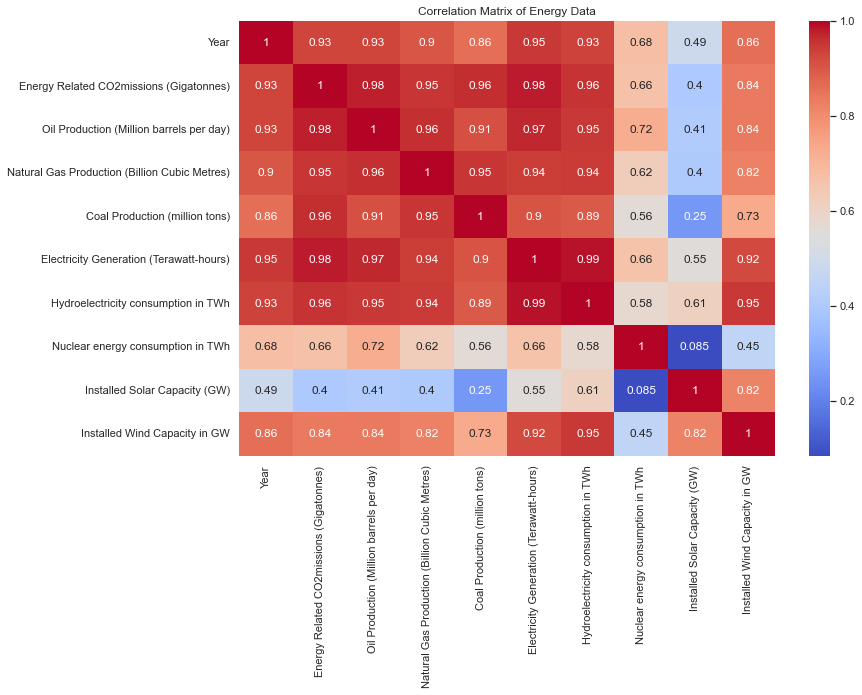

,Year,Energy Related CO2missions (Gigatonnes),Oil Production (Million barrels per day),Natural Gas Production (Billion Cubic Metres),Coal Production (million tons),Electricity Generation (Terawatt-hours),Hydroelectricity consumption in TWh,Nuclear energy consumption in TWh,Installed Solar Capacity (GW),Installed Wind Capacity in GW
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2006.500000,27.138710,80.171613,2857.516667,6119.933333,19334.567742,3170.965161,2557.062581,199.659091,206.760645
std,9.380832,4.677101,9.111183,593.765469,1393.156035,5024.492982,679.012247,203.543656,229.871867,247.486583
min,1991.000000,20.500000,65.440000,2026.800000,4327.000000,12218.000000,2240.480000,2089.560000,1.300000,1.930000
25%,1998.750000,22.375000,72.922500,2325.500000,4621.750000,14814.250000,2619.430000,2451.900000,14.300000,12.750000
50%,2006.500000,27.469355,81.635000,2857.516667,6119.933333,19244.783871,3052.720000,2612.720000,199.659091,84.000000
75%,2014.250000,31.750000,87.100000,3336.625000,7552.500000,23584.325000,3803.690000,2707.430000,199.659091,331.750000
max,2022.000000,33.500000,94.960000,3976.200000,7976.000000,28466.000000,4370.000000,2800.270000,939.000000,837.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid")

# Plotting correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data_csv.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Energy Data")
plt.show()

# Descriptive statistics
descriptive_stats = data_csv.describe()
descriptive_stats


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparing the data for modeling
X = data_csv.drop(['Energy Related CO2missions (Gigatonnes)', 'Year'], axis=1)
y = data_csv['Energy Related CO2missions (Gigatonnes)']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predicting on test data
linear_pred = linear_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)

# Calculating and printing the performance
linear_mse = mean_squared_error(y_test, linear_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
linear_r2 = r2_score(y_test, linear_pred)
rf_r2 = r2_score(y_test, rf_pred)

(linear_mse, rf_mse, linear_r2, rf_r2)


(0.26482821310417876,
 1.2970180509885485,
 0.983168280530631,
 0.9175652634398168)

선형 회귀 모델:

평균 제곱 오차(MSE): 0.265
결정 계수(R²): 0.983
랜덤 포레스트 회귀 모델:

평균 제곱 오차(MSE): 1.392
결정 계수(R²): 0.912

In [9]:
# Function to predict CO2 emissions for a given scenario
def predict_co2_emissions(model, data, scenario):
    # Applying the scenario changes to the data
    if scenario == 'scenario1':
        # 10% increase in solar and wind capacity annually
        data['Installed Solar Capacity (GW)'] *= 1.1
        data['Installed Wind Capacity in GW'] *= 1.1
    elif scenario == 'scenario2':
        # 5% decrease in coal production annually
        data['Coal Production (million tons)'] *= 0.95

    # Making predictions using the model
    return model.predict(data)

# Applying scenarios and predicting CO2 emissions
scenario1_prediction = predict_co2_emissions(linear_model, X.copy(), 'scenario1')
scenario2_prediction = predict_co2_emissions(linear_model, X.copy(), 'scenario2')

# The average CO2 emission predictions for each scenario
avg_co2_scenario1 = np.mean(scenario1_prediction)
avg_co2_scenario2 = np.mean(scenario2_prediction)

(avg_co2_scenario1, avg_co2_scenario2)


(27.11268657776549, 26.868013265480258)

시나리오 1 (태양광 및 풍력 발전 용량 10% 증가): 평균 CO2 배출량은 약 27.11 기가톤으로 예측됩니다.
    
시나리오 2 (석탄 생산량 5% 감소): 평균 CO2 배출량은 약 26.87 기가톤으로 예측됩니다.